<a href="https://colab.research.google.com/github/andresanchetta/Imersao_de_Dados_2021/blob/main/Aula3_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Dados

In [2]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
dados.columns = dados.columns.str.replace('-','')
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [24]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

#Desafios

##Desafio 01: Criar tabelas de frequência com pandas.groupby()


In [51]:
#Replicando a tabela crosstab da aula:
dados.groupby(by=['dose','tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

*  **.unstack()**: Dinamizar um nível dos rótulos de índice (necessariamente hierárquicos).
Retorna um DataFrame com um novo nível de rótulos de coluna cujo nível mais interno consiste nos rótulos de índice dinâmico.


---

https://pbpython.com/pandas-crosstab.html

In [50]:
dados.groupby(by=['dose','tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [55]:
#Pode-se também usar o .count() no lugar do .value_counts() incluindo o 'tratamento' dentro do groupby.
dados.groupby(by=['dose','tempo','tratamento'])['tratamento'].count().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [54]:
# Pode-se utilizar também o ['id'] no lugar de filtrar pela coluna ['tratamento'], 
# caso utilizado após o .count() onde tratamento deixa de ser uma coluna.
dados.groupby(by=['dose','tempo','tratamento']).count()['id'].unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [133]:
#Para normalizar os parametros groupby, podemos utilizar:
dados.groupby(by=['dose','tempo'])['tratamento'].value_counts(normalize=True).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

##Desafio 02: Normalizar o crosstab pela coluna.


In [26]:
#Simplismente incluindo o parametro normalize com o valor 'columns'.
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

##Desafio 03: Explorar outros agregadores.


Alguns dos agregadores possíveis são:

* **count():**	Contagem do total de valores;

* **value_counts():** Contagem por frequencia

* **first():** Primeiro valor;

* **last():**	 Ultimo Valor;

* **mean():** Média dos Valores;

* **median():** Mediana dos Valores

* **min():** Valor Mínimo;

* **max():** Valor Máximo;

* **std():** Desvio Padrão dos Valores;

* **var():** Variância;

* **mad():**	Desvio Absoluto;

* **prod():**	Produto dos Valores;

* **sum():**	Soma dos Valores;

In [61]:
#Exemplo utilizando a média dos valores de g0:
dados.groupby(by=['dose','tempo','tratamento']).mean()['g0'].unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

##Desafio 04: Explorar o melt.


**Função Melt:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt

>DataFrame.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

**Parâmetros**:
1. **id_vars:** Variáveis que serão as linhas

1. **value_vars:** Variáveis que serão colunas

1. **var_name:** Nome da coluna das variaveis

1. **value_name:** Nome dos valores

1. **col_level:** Em caso de MultiIndex escolhe um

1. **ignore_index:** Se True, o índice original é ignorado. Se for False, o índice original será retido. Os rótulos de índice serão repetidos conforme necessário.

In [74]:
#Reproduzindo a tabela feita com crosstab na aula:
dados.melt(id_vars=['dose','tempo'],value_vars=['tratamento'],).value_counts().unstack()

value                  com_controle  com_droga
dose tempo variable                           
D1   24    tratamento           301       3585
     48    tratamento           343       4011
     72    tratamento           307       3600
D2   24    tratamento           305       3581
     48    tratamento           305       3591
     72    tratamento           305       3580

In [75]:
#Alterando os parametros relacionados a nomes para entender quais são eles
dados.melt(id_vars=['dose','tempo'],value_vars=['tratamento'], var_name='VAR', value_name='Tratamentos:').value_counts().unstack()

Tratamentos:           com_controle  com_droga
dose tempo VAR                                
D1   24    tratamento           301       3585
     48    tratamento           343       4011
     72    tratamento           307       3600
D2   24    tratamento           305       3581
     48    tratamento           305       3591
     72    tratamento           305       3580

##Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.


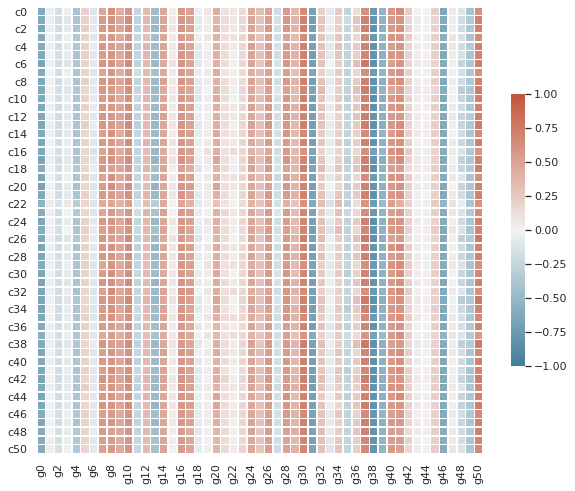

In [130]:
#Cálculo da correlação entre [g0:g50] e [c0:c50] e plot na forma de heatmap:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

cols_genes = [f'g{i}' for i in range(0, 51)]
cols_celular = [f'c{i}' for i in range(0, 51)]
corr_mat = dados[cols_genes+cols_celular].corr().loc[cols_celular,cols_genes]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Pela análise do heatmap criado, podemos inferir que cada gene $g_i$ tem o mesmo tipo de correlação com cada tipo celular $c_i$, ou seja, se analisarmos $g_0$, suas relações com todos os 50 $c_i$ são de uma intensidade considerável e negativa.

In [128]:
#Investigando a inferencia de que os genes possuem aproximadamente a mesma correlação cos os tipos celulares, usando g0 como exemplo:
corr_mat.describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.630127,-0.012016,-0.174360,-0.058328,-0.377633,0.194106,-0.084190,0.543642,0.582537,0.467978,0.616250,-0.243388,0.353399,-0.467813,0.478680,0.059888,0.566332,0.500018,-0.055295,0.040714,0.420884,0.127059,0.049391,0.165540,0.475472,0.307823,0.528405,-0.163778,0.551114,0.367726,0.685594,-0.687665,0.281072,-0.060107,0.243190,-0.257320,0.234996,0.694499,-0.792248,-0.545888,0.555794,0.592668,0.201489,0.040569,0.007077,0.211314,-0.610612,0.043824,-0.195579,-0.370182,0.691049
std,0.027714,0.019087,0.010597,0.031891,0.018749,0.011389,0.018843,0.035090,0.032433,0.019671,0.028725,0.026940,0.015056,0.034486,0.016055,0.022536,0.020310,0.023915,0.028027,0.026513,0.036457,0.016872,0.040178,0.010421,0.028345,0.019904,0.023270,0.020370,0.034449,0.026840,0.033577,0.020889,0.038150,0.029026,0.036200,0.024851,0.050985,0.045371,0.033786,0.021925,0.025531,0.041687,0.023069,0.014011,0.018400,0.012181,0.024674,0.026862,0.056633,0.018536,0.048394
min,-0.684132,-0.039616,-0.193688,-0.118651,-0.415720,0.161127,-0.125494,0.455454,0.482568,0.395817,0.504279,-0.282860,0.315188,-0.526162,0.439859,-0.002273,0.490715,0.404194,-0.114472,-0.019218,0.304244,0.090673,-0.025578,0.143705,0.395808,0.262068,0.463218,-0.218613,0.406720,0.282392,0.575842,-0.712277,0.201658,-0.139934,0.167848,-0.314889,0.133348,0.573789,-0.835374,-0.583410,0.486120,0.420225,0.145222,0.008277,-0.039508,0.184666,-0.638071,-0.008706,-0.305419,-0.403137,0.561603
25%,-0.648559,-0.027412,-0.180983,-0.077985,-0.390199,0.186212,-0.094860,0.520055,0.561236,0.456347,0.598341,-0.262108,0.345463,-0.486329,0.468278,0.046016,0.558696,0.489506,-0.071883,0.029081,0.402573,0.116459,0.022295,0.158157,0.465106,0.295129,0.513151,-0.175171,0.540349,0.351667,0.676015,-0.700666,0.258721,-0.078085,0.214846,-0.272913,0.197614,0.666806,-0.818302,-0.560639,0.539596,0.582803,0.189039,0.031505,-0.002479,0.204091,-0.626669,0.027391,-0.233561,-0.384035,0.665275
50%,-0.630989,-0.015203,-0.176356,-0.062907,-0.382014,0.194308,-0.082641,0.554030,0.591916,0.470108,0.621762,-0.242314,0.354224,-0.475688,0.479230,0.061464,0.569224,0.504904,-0.059384,0.040463,0.422431,0.127599,0.045356,0.168337,0.481139,0.307052,0.535859,-0.165603,0.558327,0.377181,0.695892,-0.692735,0.288719,-0.058166,0.239953,-0.257297,0.238836,0.707984,-0.802324,-0.551264,0.559360,0.598312,0.200586,0.041341,0.009115,0.212410,-0.614751,0.045159,-0.200306,-0.372594,0.704723
75%,-0.612169,-0.003908,-0.168270,-0.039445,-0.364845,0.202637,-0.075363,0.567095,0.603583,0.481567,0.639325,-0.229068,0.365125,-0.455175,0.489841,0.079040,0.579994,0.512035,-0.041292,0.054864,0.443024,0.136747,0.074704,0.172729,0.497568,0.323196,0.542477,-0.153181,0.574987,0.384854,0.706653,-0.682652,0.307036,-0.040698,0.267587,-0.240633,0.267556,0.725198,-0.772284,-0.532802,0.574000,0.618981,0.216803,0.051076,0.021529,0.218592,-0.602218,0.058752,-0.157164,-0.359550,0.721554
max,-0.543857,0.052851,-0.137744,0.070106,-0.319028,0.215303,-0.040555,0.601156,0.635764,0.495459,0.650982,-0.139720,0.382852,-0.319859,0.506931,0.098602,0.596062,0.543244,0.011691,0.110752,0.493093,0.173579,0.150078,0.186679,0.514064,0.343686,0.572414,-0.113033,0.599994,0.407344,0.730331,-0.611126,0.350479,-0.001378,0.342178,-0.185724,0.334958,0.765286,-0.687731,-0.481280,0.594806,0.654305,0.257169,0.065911,0.

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)


**seaborn.heatmap:** https://seaborn.pydata.org/generated/seaborn.heatmap.html

> seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

**Parâmetros:**
1. **data:**  dataset retangular    
Conjunto de dados 2D que pode ser coagido em um ndarray. Se um Pandas DataFrame for fornecido, as informações de índice / coluna serão usadas para rotular as colunas e linhas.

1. **vmin, vmax:** float (Opcional)   
Valores minimo e máximos, respectivamente, para a escala de cores.

1. **cmap:** Nome de um mapa de cores do matplotlib ou objeto, ou ainda uma lista de(Opcional)  
Mapa de cores a ser utilizado, caso não fornecido dependerá do valor central.

1. **center:** float (Opcional)   
Valor central da relação, influencia diretamente no mapa de cores.

1. **robust:** bool (Opcional)  
Se True e vmin ou vmax estiverem ausentes, o intervalo do mapa de cores será calculado com quantis robustos em vez de valores extremos.

1. **annot:** bool ou dataset retangular (Opcional)
Se for Verdadeiro, escreva o valor dos dados em cada célula. Se for semelhante a uma matriz com a mesma forma dos dados, use isso para anotar o mapa de calor em vez dos dados. Observe que o DataFrames irá corresponder na posição, não índice.

1. **fmt:** str (Opcional)  
String utilizada para incluir anotações.

1. **annot_kws:** dicionário de chave, mapeamentos de valor (Opcional)
Argumentos de palavra-chave para matplotlib.axes.Axes.text () quando annot é True.

1. **linewidths:** float (Opcional)  
Grossura da linha que divide as células.

1. **linecolor:** color (Opcional)  
Cor da linha que divide as células.

1. **cbar:** bool (Opcional)  
De onde extrair a barra de cores.

1. **cbar_kws:** dicionário de chave, mapeamentos de valor (Opcional)  
Argumentos de palavra-chave para matplotlib.figure.Figure.colorbar ().

1. **cbar_ax:** matplotlib Axes (Opcional)  
Eixos nos quais desenhar a barra de cores, caso contrário, ocupam espaço dos Eixos principais.

1. **square:** bool (Opcional)  
Se for True, defina o aspecto dos eixos como “igual” para que cada célula tenha formato quadrado.

1. **xticklabels, yticklabels:** “auto”, bool, list-like, ou int (Opcional)  
Se True, plote os nomes das colunas do dataframe. Se for False, não plote os nomes das colunas. Se for do tipo lista, plote esses rótulos alternativos como xticklabels. Se for um inteiro, use os nomes das colunas, mas plote apenas cada rótulo n. Se for “auto”, tente plotar densamente os rótulos não sobrepostos.

1. **mask:** vetor bool ou DataFrame (Opcional)  
Se passado, os dados não serão mostrados nas células onde a máscara é True. As células com valores ausentes são mascaradas automaticamente.

1. **ax:** matplotlib Axes (Opcional)  
Eixos nos quais desenhar o gráfico, caso contrário, use os Eixos atualmente ativos.

1. **kwargs:** outros argumentos keyword 
Todos os outros argumentos de palavra-chave são passados para matplotlib.axes.Axes.pcolormesh ().

**Retorna**

ax : matplotlib Axes

Axes object with the heatmap.


---



Exemplos de utilizações: [Towards Data Science - Heatmap](https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c)

##Desafio 07: Resumo do que você aprendeu com os dados

Nesta aula pudemos utilizar ferramentas para o melhor entedimento das correlações entre os dados analisados, ou seja, o que estes dados querem nos dizer.